In [470]:
import tweepy
import json
# import TweetData # My tweet class
import time
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import datetime
import pandas as pd
import os
import ast
import networkx as nx

# Data Collection

In [52]:
class listener(StreamListener):

    def on_data(self, data):
        print(data)
        return(True)

    def on_error(self, status):
        print(status)

In [681]:
twitter_keys = {}
# YOUR ANSWER HERE

with open("credentials.txt") as f:
    for line in f:
#         print(line.split(":"))
        (key, val) = line.split()
        twitter_keys[key] = val



#Add your credentials here
# twitter_keys = {
#         'consumer_key':        '',
#         'consumer_secret':     '',
#         'access_token_key':    '',
#         'access_token_secret': ''
#     }
#Setup access to API
auth = tweepy.OAuthHandler(twitter_keys['API_Key:'], twitter_keys['API_Secret_Key:'])
auth.set_access_token(twitter_keys['Access_Token:'], twitter_keys['Access_Token_Secret:'])

api = tweepy.API(auth)

In [7]:
def extract_coordinates(row):
    if row['Tweet Coordinates']:
        return row['Tweet Coordinates']['coordinates']
    else:
        return None

In [8]:
def extract_place(row):
    if row['Place Info']:
        return row['Place Info'].full_name
    else:
        return None

In [9]:
def extract_country(row):
    if row['Country']:
        return row['Country'].country_code
    else:
        return None

In [10]:
def extract_hashtags(row):
    h=[]
    if row['Hashtags']:
        ent = row['Hashtags']
        for t in ent['hashtags']:
            h.append(t['text'])
        return h
    else:
        return None

In [11]:
def extract_tweets(row):
     if row['Retweeted Status']:
        return row['Retweeted Status'].tweet.full_text
     else:
        return None

In [693]:
# tweet_ids

In [59]:
tweet_ids = pd.read_csv('isarcasm_train.csv', header=None)

In [694]:
# tweet_ids[0].iloc[1:]

In [63]:
# tweet_ids

# Pulling information from tweets iterable object
# Add or remove tweet information you want in the below list comprehension
tweets = []
for tt in tweet_ids[0].iloc[1:]:
    try:
        tweets.append(api.get_status(tt, tweet_mode= 'extended'))
    except:
        continue
        
tweets_list = [[tweet.full_text, tweet.created_at, tweet.id, tweet.user.id,tweet.user.screen_name, tweet.user.location, 
                    tweet.coordinates, tweet.place,tweet.place, tweet.entities,tweet.retweet_count, 
                    tweet.favorite_count, 
                    tweet.lang, tweet.source, tweet.in_reply_to_status_id,
                    tweet.in_reply_to_user_id] for tweet in tweets]
 
# Creation of dataframe from tweets_list
# Add or remove columns as you remove tweet information
tweets_df = pd.DataFrame(tweets_list,columns=['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'User Id',
                                              'User Name', 'User Location','Tweet Coordinates', 'Place Info', 'Country',
                                               'Hashtags','Retweets', 'Favorites', 'Language', 'Source', 
                                              'Replied Tweet Id', 'Replied Tweet User Id'])
 
# Checks if there are coordinates attached to tweets, if so extracts them
tweets_df['Tweet Coordinates'] = tweets_df.apply(extract_coordinates,axis=1)
 
# Checks if there is place information available, if so extracts them
tweets_df['Place Info'] = tweets_df.apply(extract_place,axis=1)
tweets_df['Country'] = tweets_df.apply(extract_country,axis=1)
tweets_df['Hashtags'] = tweets_df.apply(extract_hashtags,axis=1)
# tweets_df['Retweeted Status'] = tweets_df.apply(extract_tweets,axis=1)

In [692]:
# print(tweets_df)

In [58]:
tweets_df.to_csv('WearMask_Tweets/May_WearMask_Tweets.csv', index=False)

In [84]:
sar_list = pd.read_csv('SPIRS-master/SPIRS-non-sarcastic-ids.csv')

In [691]:
# sar_list

In [87]:
sar_list2=sar_list['sar_id']

In [88]:
id_lists = [sar_list2[x:x+100] for x in range(0, len(sar_list2), 100)]

In [ ]:
tweets = []

for iid in id_lists:
    print(iid)
    tweets.extend(api.statuses_lookup(list(iid), tweet_mode='extended'))

In [90]:
tweets_list = [[tweet.full_text, tweet.created_at, tweet.id, tweet.user.id,tweet.user.screen_name, tweet.user.location, 
                    tweet.coordinates, tweet.place,tweet.place, tweet.entities,tweet.retweet_count, 
                    tweet.favorite_count, 
                    tweet.lang, tweet.source, tweet.in_reply_to_status_id,
                    tweet.in_reply_to_user_id] for tweet in tweets]
 
# Creation of dataframe from tweets_list
# Add or remove columns as you remove tweet information
tweets_df = pd.DataFrame(tweets_list,columns=['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'User Id',
                                              'User Name', 'User Location','Tweet Coordinates', 'Place Info', 'Country',
                                               'Hashtags','Retweets', 'Favorites', 'Language', 'Source', 
                                              'Replied Tweet Id', 'Replied Tweet User Id'])
 
# Checks if there are coordinates attached to tweets, if so extracts them
tweets_df['Tweet Coordinates'] = tweets_df.apply(extract_coordinates,axis=1)
 
# Checks if there is place information available, if so extracts them
tweets_df['Place Info'] = tweets_df.apply(extract_place,axis=1)
tweets_df['Country'] = tweets_df.apply(extract_country,axis=1)
tweets_df['Hashtags'] = tweets_df.apply(extract_hashtags,axis=1)

In [91]:
tweets_df.to_csv('Non_Sarcastic_Tweets.csv', index=False)

In [690]:
# tweets_df

# Count of Tweets

In [646]:
nmask = pd.read_csv('no_mask_geocoded (1).csv', index_col=False)
# nmask=nmask.drop_duplicates('Tweet Text', keep='first')

In [648]:
mask = pd.read_csv('pro_mask_geocoded.csv', index_col=False)


In [649]:
len(mask)

48443

In [647]:
len(nmask)

12932

In [432]:
nmask_US=nmask[nmask['USA']==1]

In [433]:
len(nmask_US)

2735

In [437]:
nmask_US['Hashtags']=nmask_US['Hashtags'].apply(lambda row:row.lower())

/Users/swadtasnim002/.local/share/virtualenvs/SMM_Homework-y6Z_ZVFB/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [438]:
nmask_US['Month']=nmask_US['Tweet Datetime'].apply(lambda row: row.split(" ")[0].split("-")[1])

/Users/swadtasnim002/.local/share/virtualenvs/SMM_Homework-y6Z_ZVFB/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [439]:
nmask_US_count_tweets_by_month=list(nmask_US.groupby([nmask_US['Month']]).agg('count')['Tweet Datetime'])

In [440]:
nmask_US.groupby([nmask_US['Month']]).agg('count')['Tweet Datetime'].reindex()

Month
04     91
05    323
06    287
07    715
08    398
09    407
10    396
11    118
Name: Tweet Datetime, dtype: int64

In [441]:
months = [4,5,6,7,8,9,10,11]
months_name = ['April','May','June','July','August','September','October','November']

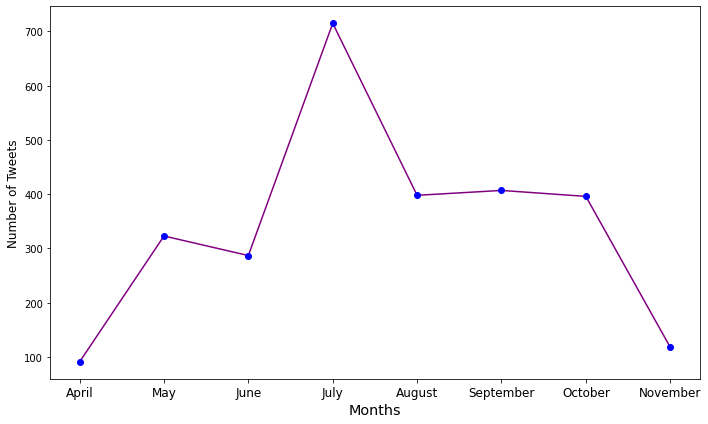

In [442]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(months, nmask_US_count_tweets_by_month, color='purple')
plt.plot(months, nmask_US_count_tweets_by_month,'bo')
plt.xticks(months, months_name, fontsize='large')
# plt.legend(["Data", "$G(n,p)$ model"])
plt.xlabel("Months", fontsize="x-large")
plt.ylabel("Number of Tweets", fontsize="large")
plt.tight_layout()
plt.savefig("Num_Tweets_Monthly.png")

Only July

In [443]:
nmask_US_July=nmask_US[nmask_US['Month']=='07']

In [444]:
nmask_US_July=nmask_US_July.sort_values(by='Tweet Datetime')

In [502]:
nmask_US_July.iloc[0]['Hashtags'].replace("[","").replace("]","").split(", ")

["'askgovmurphy'",
 "'nomask'",
 "'nofear'",
 "'fakenews'",
 "'sheepnomore'",
 "'wwg1wga'",
 "'walkaway'"]

In [446]:
nmask_US_July['Day']=nmask_US_July['Tweet Datetime'].apply(lambda row: row.split(" ")[0])

In [695]:
# nmask_US_July.groupby([nmask_US_July['Day']]).agg('count')

In [448]:
nmask_US_July.groupby([nmask_US_July['User Location']]).count()['Tweet Text'].nlargest(30)

User Location
United States                    63
USA                              42
California, USA                  17
Florida, USA                     16
Earth                            13
Texas, USA                       13
Ohio, USA                        12
Reno; Parler @WonderWoman4USA     9
North Carolina, USA               7
Pennsylvania, USA                 7
America                           6
Arizona, USA                      6
Chicago, IL                       6
Las Vegas, NV                     6
South Carolina, USA               6
Brooklyn NY                       5
South Florida                     5
Tempe, AZ                         5
Texas                             5
Wisconsin, USA                    5
Zachary, LA                       5
California                        4
Check your Six                    4
Colorado                          4
Florida                           4
Hawaii, USA                       4
Los Angeles, California           4
Minnesota, USA

In [449]:
Frequent_Location_July= ['California','Florida','Texas','Ohio','Arizona','Georgia','New York','Chicago','Louisiana',
                    'Philadelphoa','Virginia']

In [450]:
def hashtags(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x.lower()) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtag', 'number']).head(22).sort_values('number', ascending=True)
    return df

In [596]:
def bar_chart(tags, number, title,file):
    plt.figure(figsize=(10,5))
    plt.barh(tags, number)
    plt.title(title)
    plt.xlabel('number of times hashtag appeared')
    plt.show()
    plt.savefig(file)

In [452]:
tags=hashtags(nmask_US.Hashtags)

In [453]:
tags2=tags.set_index('hashtag')
tags=tags2.drop(index=['nomask','nomasks'
                       ,'nomaskmandate'])

In [454]:
tags=tags.reset_index()

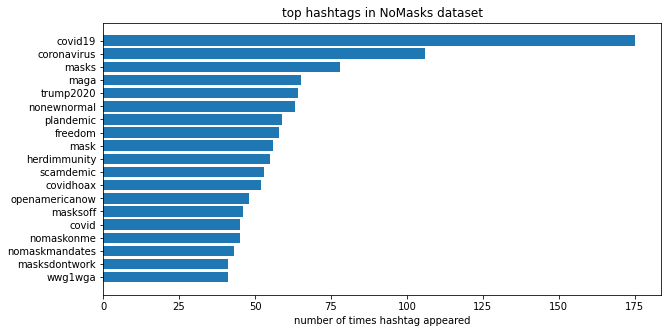

In [600]:
# plt.figure(figsize=(10,5))
fig=plt.figure(figsize=(10,5))
plt.barh(tags.hashtag, tags.number)
plt.title('top hashtags in NoMasks dataset')
plt.xlabel('number of times hashtag appeared')
plt.show()
fig.savefig('top_hashtags.png')
# bar_chart(tags.hashtag, tags.number, 'top hashtags in NoMasks dataset','top_hashtags.png')
# plt.savefig('top_hashtags.png')

In [456]:
import re

In [457]:
nmask_US['tags'] = nmask_US['Tweet Text'].apply(lambda x: str(re.findall(r"@(\w+)", str(x))))
nmask_US['tags'] = nmask_US['tags'].apply(lambda x: ast.literal_eval(x))
type(nmask_US.iloc[0].tags)

/Users/swadtasnim002/.local/share/virtualenvs/SMM_Homework-y6Z_ZVFB/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/swadtasnim002/.local/share/virtualenvs/SMM_Homework-y6Z_ZVFB/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


list

In [458]:
nmask_US['tags'] = [str(i).lower() for i in nmask_US['tags']]
nmask_US.head(5)

/Users/swadtasnim002/.local/share/virtualenvs/SMM_Homework-y6Z_ZVFB/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Tweet Text,Tweet Datetime,Tweet Id,User Id,User Name,User Location,Tweet Coordinates,Place Info,Country,Hashtags,...,Language,Source,Replied Tweet Id,Replied Tweet User Id,location,Lat,Lon,USA,Month,tags
0,@GovMikeDeWine #OpenOhio.\nPeriod.\n#NoMasks \...,2020-05-01 01:41:25,1256035969930756098,626964949,havalaudon,Ohio,NaN,NaN,NaN,"['openohio', 'nomasks', 'novaccine']",...,en,Twitter Web App,1.255991e+18,1.882039e+07,Ohio,40.4173,-82.9071,1.0,05,"['govmikedewine', 'govmikehuckabee', 'dramyact..."
2,#ConstitutionOverCoronavirus #socialism #facis...,2020-05-01 03:30:18,1256063370039607296,2167062020,LORISAXON,"Washington, DC",NaN,NaN,NaN,"['constitutionovercoronavirus', 'socialism', '...",...,und,Twitter for iPhone,NaN,NaN,"Washington, DC",38.9072,-77.0369,1.0,05,[]
3,@SecondLady it is unfortunate that Mike is a c...,2020-05-01 04:10:51,1256073573090725888,2879956695,chandran221,"Colorado, USA",NaN,NaN,NaN,['nomask'],...,en,Twitter for iPhone,NaN,8.221271e+17,"Colorado, USA",39.5501,-105.7820,1.0,05,['secondlady']
4,@GovMikeDeWine Wait. I thought the weirdo you ...,2020-05-01 17:32:20,1256275274666323972,626964949,havalaudon,Ohio,NaN,NaN,NaN,"['openohio', 'novaccine', 'nomask']",...,en,Twitter for Android,1.256267e+18,1.882039e+07,Ohio,40.4173,-82.9071,1.0,05,['govmikedewine']
6,#Detroit looked like this just seven weeks ago...,2020-05-01 17:33:00,1256275441591046144,419735656,DeadlineDetroit,"Detroit, MI",NaN,NaN,NaN,"['detroit', 'nomasks', 'throwback', 'nostalgia...",...,en,TweetDeck,NaN,NaN,"Detroit, MI",42.3314,-83.0458,1.0,05,[]


In [459]:
def mention(col):
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['tags', 'number']).head(150).sort_values('number', ascending=False)
    return df

In [460]:
tags_m = mention(nmask_US.tags)
tags_m

,tags,number
0,realdonaldtrump,133
1,govmikedewine,62
2,gavinnewsom,38
3,govabbott,35
4,potus,32
...,...,...
129,brandonstraka,3
127,andyfurniss,3
126,9newsnancy,3
125,9kwiz,3


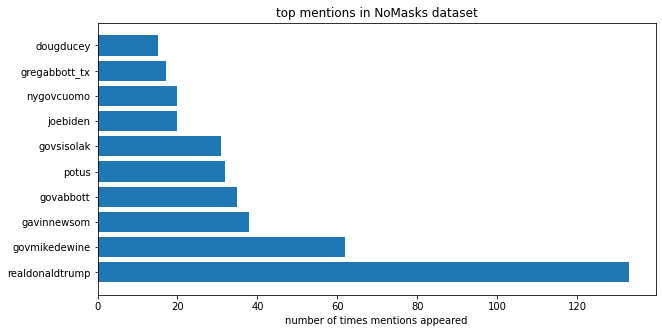

In [602]:
# tags_m.head(30).plot(kind='bar',x='number',y='tags', color ='green')
fig=plt.figure(figsize=(10,5))
plt.barh(tags_m.head(10).tags, tags_m.head(10).number)
plt.title('top mentions in NoMasks dataset')
plt.xlabel('number of times mentions appeared')
plt.show()
fig.savefig('top_mentions.png')
# bar_chart(tags_m.head(10).tags, tags_m.head(10).number, 'top mentions in NoMasks dataset')

In [462]:
nmask_US.to_csv('USA.csv',index=False)

In [463]:
nmask_US['location']=nmask_US['location'].apply(lambda row: row.lower())

/Users/swadtasnim002/.local/share/virtualenvs/SMM_Homework-y6Z_ZVFB/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [464]:
nmask_US['location']=nmask_US['location'].apply(lambda row: row.replace(", usa",""))

/Users/swadtasnim002/.local/share/virtualenvs/SMM_Homework-y6Z_ZVFB/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [465]:
nmask_US.groupby('location').count()['Tweet Text'].nlargest(10)

location
united states      229
usa                167
ohio                97
florida             75
texas               72
california          56
earth               47
las vegas, nv       46
arizona             34
newport news va     28
Name: Tweet Text, dtype: int64

In [ ]:
for n,g in nmask_US.groupby('Month'):
#     print(g)
    tags = hashtags(g.Hashtags)
    plt.figure(figsize=(10,5))
    bar_chart(tags.hashtag, tags.number, 'top hashtags in NoMasks dataset')

In [689]:
# nmask_US

# Networ Building

In [416]:
len(nmask_US['User Id'].unique())

1746

In [417]:
nmask_US.columns

Index(['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'User Id', 'User Name',
       'User Location', 'Tweet Coordinates', 'Place Info', 'Country',
       'Hashtags', 'Retweets', 'Favorites', 'Language', 'Source',
       'Replied Tweet Id', 'Replied Tweet User Id', 'location', 'Lat', 'Lon',
       'USA', 'Month', 'tags'],
      dtype='object')

In [ ]:
user_to_hashtags_dict = {}
for r in zip(nmask_US['User Id'],nmask_US['Hashtags']):
    print(r[0],r[1].replace("[","").replace("]","").split(", "))
    if r[0] in user_to_hashtags_dict.keys():
        h = user_to_hashtags_dict[r[0]]
        h.extend(r[1].replace("[","").replace("]","").split(", "))
        user_to_hashtags_dict[r[0]]=list(set(h))
    else:
        user_to_hashtags_dict[r[0]]=list(set(r[1].replace("[","").replace("]","").split(", ")))
        

In [688]:
# user_to_hashtags_dict

In [547]:
B=nx.Graph() #create an empty graph
for user in user_to_hashtags_dict: #loop over all the users
    for hashtag in user_to_hashtags_dict[user]: #for each user loop over the hashtags they use
        B.add_edge(user,hashtag) #add the edge User<->hashtag

In [687]:
# B.edges()

In [ ]:
actual_users_with_hashtags = [x for x in list(set(nmask_US['User Id'])) if x in B.nodes()] #create a list of users actually appearing in the network - perhaps some tweeting users never used a hashtag and we want to ignore them.

In [686]:
# actual_users_with_hashtags

In [550]:

G = nx.bipartite.weighted_projected_graph(B,nodes =actual_users_with_hashtags)

In [685]:
# G.edges()

In [ ]:
for a,b in G.edges():
    if G[a][b]['weight'] !=1:
         print(G[a][b]['weight'])

In [684]:
# nx.betweenness_centrality(G)

In [554]:
nx.write_graphml(G, "nmask_users_us.graphml")

In [555]:
def degreecumdist(G, k):
    """
    Compute the cumulative probability of degree value k in graph G
    
    Parameters
    ==========
    G : networkx.Graph
        The graph
        
    k : int
        The degree value
    
    Returns
    =======
    P_k : float
        The cumulative probability of degree k or greater
    """
    # YOUR CODE HERE
    num_nodes_k=0
    for n,d in G.degree():
        if d >= k:
            num_nodes_k +=1
        
    P_k = num_nodes_k/G.number_of_nodes()
    
    return P_k
    raise NotImplementedError()

In [571]:
def edgeprob(G):
    """
    Return the edge probability of the Random Graph model for the input graph G
    
    Parameters
    ==========
    G : networkx.Graph
        The input graph
        
    Returns
    =======
    p : float
        The probability, computed using the formula below.
        
    Notes
    =====
    
    The formula for estimating p is:
    
             avg_degree
        p =  ----------
                n - 1
    
    Where n is the number of nodes in the network
    """
    # YOUR CODE HERE
    num_degree=0
    for n,d in G.degree():
        num_degree +=d
        
    p = (num_degree/G.number_of_nodes())/(G.number_of_nodes()-1)
    
    return p
    raise NotImplementedError()

In [576]:
def degreedist(G, k):
    """
    Compute the probability of degree value k in graph G
    
    Parameters
    ==========
    G : networkx.Graph
        The graph
        
    k : int
        The degree value
    
    Returns
    =======
    p_k : float
        The probability of degree k
    """
    # YOUR CODE HERE
    
    num_nodes_k=0
    for n,d in G.degree():
        if d == k:
            num_nodes_k +=1
        
    p_k = num_nodes_k/G.number_of_nodes()
    
    return p_k
    raise NotImplementedError()

In [556]:
net = pd.read_csv('edge_list_No_Mask_US.csv', index_col=False)

In [683]:
# list(net['Degree'].sort_values())

In [577]:
x = list(range(0,2000,10)) # k=0,10..190
y = [] #P_k of Facebook Social Circle
y1 = [] #P_k of Random graph
y2 = []

G2 = nx.fast_gnp_random_graph(n=G.number_of_nodes(), p=edgeprob(G))

for k in x:
    y.append(degreecumdist(G,k))
    y1.append(degreecumdist(G2,k))
    y2.append(degreedist(G,k))
# raise NotImplementedError()

In [682]:
# y2

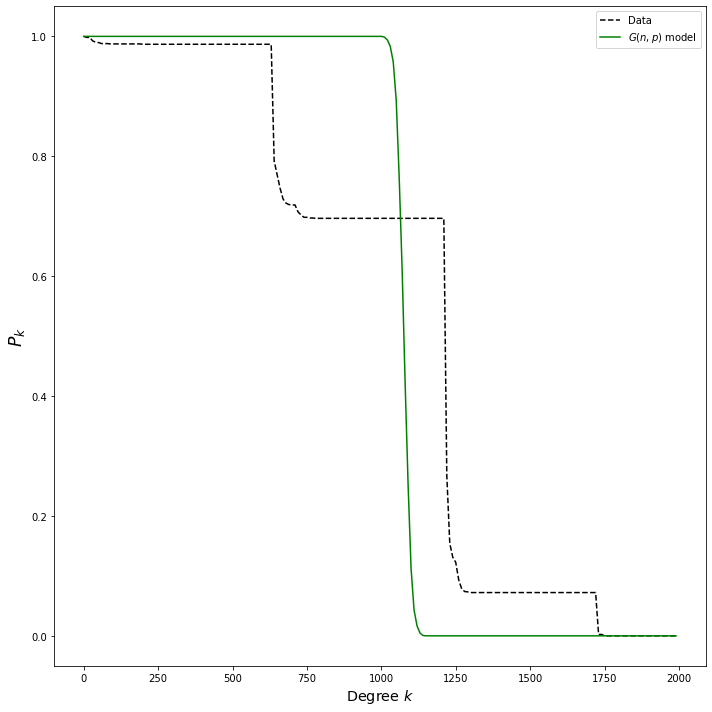

In [594]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'k--', x, y1, 'g-')
plt.legend(["Data", "$G(n,p)$ model"])
plt.xlabel("Degree $k$", fontsize="x-large")
plt.ylabel("$P_k$", fontsize="xx-large")
plt.tight_layout()
plt.savefig("cdf.png")

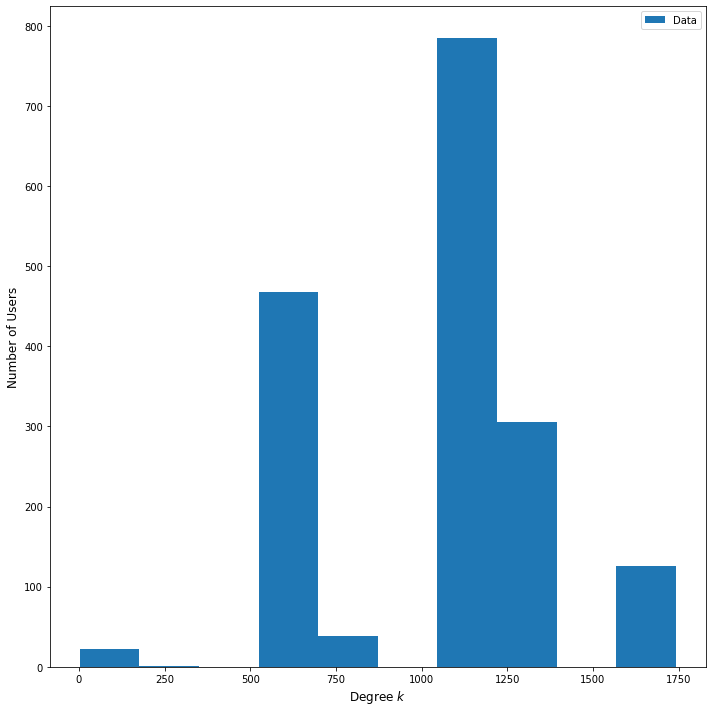

In [585]:
plt.figure(figsize=(10, 10))
plt.hist(net['Degree'])
plt.legend(["Data", "$G(n,p)$ model"])
plt.xlabel("Degree $k$", fontsize="large")
plt.ylabel("Number of Users", fontsize="large")
plt.tight_layout()
plt.savefig("Degree_Distr.png")

In [610]:
net2=net.sort_values(by='closnesscentrality', ascending=False)

In [615]:
high=pd.merge(nmask_US,net2, left_on='User Id', right_on='Id').iloc[:200]

In [ ]:
high['User Name'].unique()

In [620]:
high['location'].unique()

array(['ohio', 'washington, dc', 'colorado', 'detroit, mi', 'usa',
       'united states', 'austin tx', 'nj', 'georgia', 'houston, tx',
       'portlandia', 'dallas texas', 'connecticut', 'texas', 'nashville',
       'manley hot springs, alaska', 'warr acres, ok (heart❤️land)',
       'manhattan, nyc', 'bath, ny', 'boston, ma', 'new york',
       'bronxville, ny', 'genoa city, wi', 'tennessee', 'chicago, il',
       'los angeles, ca', 'atlanta', 'oregon (sw of portland) ☔🏀',
       'america', 'california', 'united states yellow mountians',
       'indiana', 'new york city', 'santa clara, ca', 'russellville, ar',
       'ny', 'earth', 'durango, co', 'nashville, tn', 'kentucky', 'ma',
       'newport news va', 'coast of lake mi', 'spokane, wa', 'wisconsin',
       'long island, new york', 'indianapolis, in', 'louisiana',
       'delaware', 'amory, mississippi', 'chattanooga, tn',
       'delhi | hyderabad | adilabad', 'united states of america',
       'san diego, ca', 'illinois', 'off t

In [ ]:
high['Hashtags']


In [ ]:
h = []
for r in high['Hashtags']:
    print(r.replace("[","").replace("]","").split(", "))
    h.extend(r.replace("[","").replace("]","").split(", "))

In [627]:
from collections import Counter

In [634]:
count_h=dict(Counter(h))

In [629]:
import operator

In [ ]:
sorted(count_h.items(), key=operator.itemgetter(1))